In [23]:
import pandas as pd

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])


In [24]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Data Cleaning and Preprocessing

In [25]:

import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [27]:
for i in range(0, len(messages)):
    review = re.sub('^[a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
corpus

['jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...',
 'k lar... joke wif u oni...',
 "ree entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'",
 'dun say earli hor... u c alreadi say...',
 'ah think goe usf, live around though',
 "reemsg hey darl 3 week' word back! i'd like fun still? tb ok! xxx std chg send, £1.50 rcv",
 'ven brother like speak me. treat like aid patent.',
 "per request 'mell mell (oru minnaminungint nurungu vettam)' set callertun callers. press *9 copi friend callertun",
 'inner!! valu network custom select receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'ad mobil 11 month more? u r entitl updat latest colour mobil camera free! call mobil updat co free 08002986030',
 "'m gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.",
 'ix chanc win cash! 100 20,000 pound txt> csh11 send 87575. cost 

### Creating Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)  #take 5000 most frequent words
X = cv.fit_transform(corpus).toarray()
X.shape

(5572, 5000)

In [30]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values # agar hanya 1 columns

### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training Model using Naive bayes classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [33]:
training_acc = spam_detect_model.score(X_train, y_train)
print(f'Training model accuracy: {training_acc*100}%')

Training model accuracy: 99.19228180390397%


### Testing Model

In [34]:
test_acc = spam_detect_model.score(X_test, y_test)
print(f'Testing model accuracy: {test_acc*100}%')

Testing model accuracy: 98.56502242152466%


In [35]:
y_pred = spam_detect_model.predict(X_test)

In [36]:
## another way to show accuracy of the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.9856502242152466

### Confusion Matrix
Confusion matrix between Testing data and Predicted data 

In [37]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[945,  10],
       [  6, 154]], dtype=int64)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


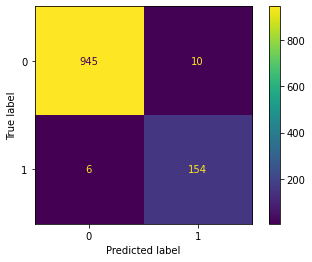

In [38]:
## Visualize using matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(spam_detect_model, X_test, y_test)
plt.show()

Percentage


<AxesSubplot:>

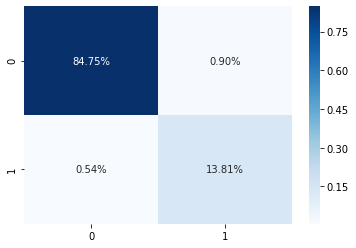

In [39]:
#Visualize using seaborn to see the percentage
import seaborn as sns
import numpy as np
print('Percentage')
sns.heatmap(confusion_m/np.sum(confusion_m), annot=True, fmt='.2%', cmap='Blues')